In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import datetime
# %matplotlib inline

# Brownian motion script
A usefull page I have used from [SpringerLink](https://link.springer.com/referenceworkentry/10.1007/978-0-387-30440-3_222)


- It plots as many particles as you like
- Each with a different colour
- You can add x or y biases to their motion, in the case of for example nutrient gradients for Ecoli cells
- Saves the images as pdfs

In [2]:
grid_size = 100 # square grid
num_steps = 20000

In [3]:
# Function to simulate Brownian motion
def brownian_motion(num_steps, start_pos, xbias=0, ybias=0):
    position = np.zeros((2, num_steps+1))  # Initialize array
    position[0, 0], position[1, 0] = start_pos[0], start_pos[1]  # Set initial position
    x, y = np.random.randint(low=-1, high=2, size=num_steps), np.random.randint(low=-1, high=2, size=num_steps)
    position[0, 1:] = x + xbias  # Generate random steps in x
    position[1, 1:] = y + ybias  # Generate random steps in y
    position = np.cumsum(position, axis=1)  # Take cumulative sum to get position
    return position

# brownian_motion(num_steps, (0, 0))

In [4]:
def plot_particle(particle, arrows=False):
    plt.plot(particle[0,:], particle[1,:], lw=0.7, alpha=0.5)
    plt.scatter(particle[0, 0], particle[1, 0], c='k', alpha=0.5)
    if arrows:
        ## add nutrient gradient ##
        minx, maxx, miny, maxy = np.min(particle[:, 0]), np.max(particle[:, 0]), np.min(particle[:, 1]), np.max(particle[:, 1])
        # plt.fill_between([maxx+maxx/50, maxx+maxx/10], miny, maxy+maxy/10, color='orange', alpha=0.5)
        ## add arrow to the right ##
        plt.arrow(minx, maxy+maxy/50, maxx-minx, 0, head_width=1, head_length=1, fc='k', ec='k')
        ## add annontation on arrow ##
        plt.text(minx+(maxx-minx)/2, maxy+maxy/35, 'Direction of nutrient gradient', ha='center', va='bottom')
    plt.axis('off')

## Bias to the right

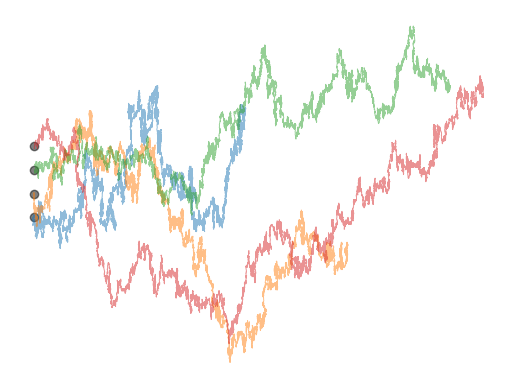

In [5]:
particle1 = brownian_motion(num_steps, start_pos=[0, 0], xbias=0.05)
particle2 = brownian_motion(num_steps, start_pos=[0, 20], xbias=0.07)
particle3 = brownian_motion(num_steps, start_pos=[0, 40], xbias=0.09)
particle4 = brownian_motion(num_steps, start_pos=[0, 60], xbias=0.11)
plot_particle(particle1)
plot_particle(particle2)
plot_particle(particle3)
plot_particle(particle4)#, arrows=True)
plt.savefig('BM_plots\\brownian_motion.pdf', dpi=600)
plt.show()

## No Bias

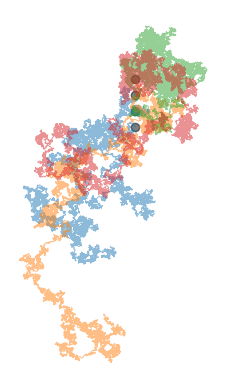

In [6]:
particle1 = brownian_motion(num_steps, start_pos=[0, 0])
particle2 = brownian_motion(num_steps, start_pos=[0, 20])
particle3 = brownian_motion(num_steps, start_pos=[0, 40])
particle4 = brownian_motion(num_steps, start_pos=[0, 60])
plot_particle(particle1)
plot_particle(particle2)
plot_particle(particle3)
plot_particle(particle4)#, arrows=True)
plt.gca().set_aspect('equal', adjustable='box')
t = datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
plt.savefig(f'BM_plots\\brownian_motion_{t}.pdf', dpi=600)
plt.show()